<a href="https://colab.research.google.com/github/noahbean33/PINN_experiments/blob/main/embedded_dsp_ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

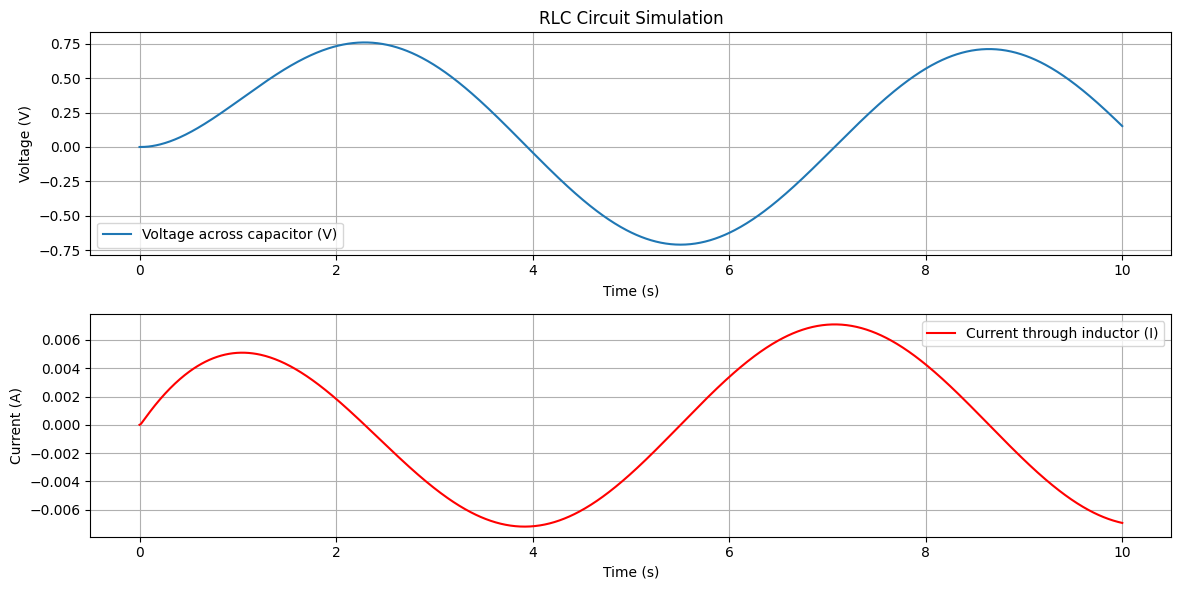

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equations for the RLC circuit
def rlc_circuit(t, y, R, L, C, V_in):
    V, I = y
    dVdt = I / C
    dIdt = (V_in(t) - V - R * I) / L
    return np.array([dVdt, dIdt])

# Runge-Kutta 4th order method
def runge_kutta_4(derivs, y0, t, args):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = derivs(t[i-1], y[i-1], *args)
        k2 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1, *args)
        k3 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2, *args)
        k4 = derivs(t[i], y[i-1] + dt * k3, *args)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

# Define the input voltage as a function of time
def V_in(t):
    return np.sin(t)  # Example: sinusoidal input voltage

# Parameters
R = 100  # Resistance in ohms
L = 1    # Inductance in henrys
C = 0.01  # Capacitance in farads

# Initial conditions: initial voltage across capacitor and initial current
y0 = [0, 0]

# Time array
t = np.linspace(0, 10, 1000)

# Solve the differential equations using Runge-Kutta method
result = runge_kutta_4(rlc_circuit, y0, t, (R, L, C, V_in))

# Extract voltage and current from the result
V = result[:, 0]
I = result[:, 1]

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V, label='Voltage across capacitor (V)')
plt.title('RLC Circuit Simulation')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I, label='Current through inductor (I)', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


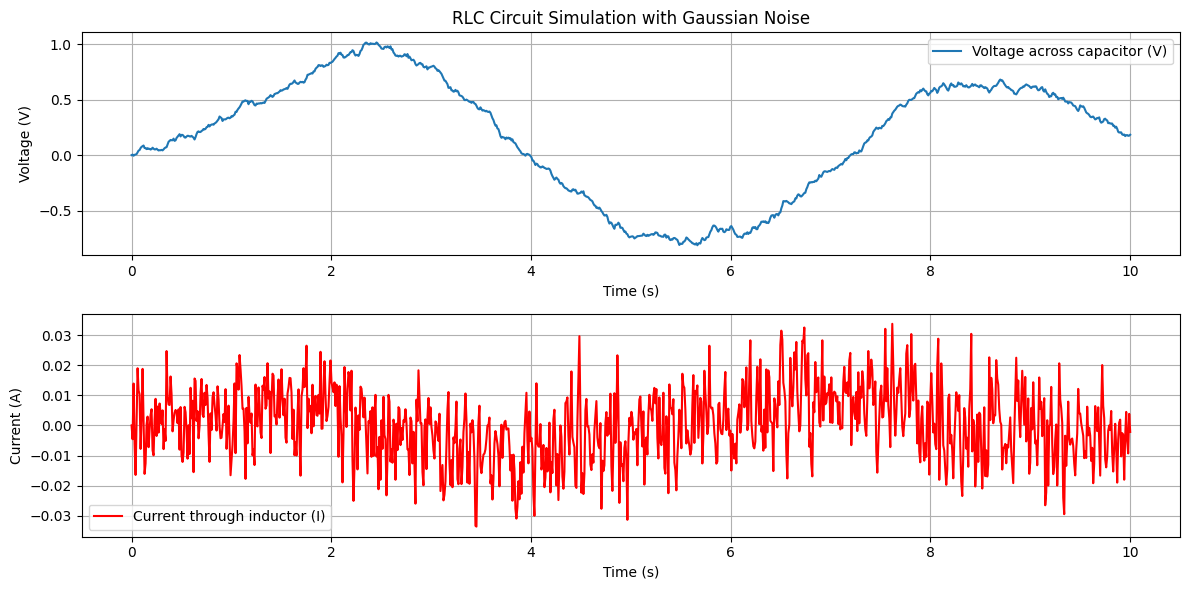

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equations for the RLC circuit
def rlc_circuit(t, y, R, L, C, V_in):
    V, I = y
    dVdt = I / C
    dIdt = (V_in(t) - V - R * I) / L
    return np.array([dVdt, dIdt])

# Runge-Kutta 4th order method with added Gaussian noise
def runge_kutta_4(derivs, y0, t, args, noise_std=0.01):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = derivs(t[i-1], y[i-1], *args)
        k2 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1, *args)
        k3 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2, *args)
        k4 = derivs(t[i], y[i-1] + dt * k3, *args)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        # Add Gaussian noise
        noise = np.random.normal(0, noise_std, size=y[i].shape)
        y[i] += noise
    return y

# Define the input voltage as a function of time
def V_in(t):
    return np.sin(t)  # Example: sinusoidal input voltage

# Parameters
R = 100  # Resistance in ohms
L = 1    # Inductance in henrys
C = 0.01  # Capacitance in farads

# Initial conditions: initial voltage across capacitor and initial current
y0 = [0, 0]

# Time array
t = np.linspace(0, 10, 1000)

# Solve the differential equations using Runge-Kutta method with noise
result = runge_kutta_4(rlc_circuit, y0, t, (R, L, C, V_in), noise_std=0.01)

# Extract voltage and current from the result
V = result[:, 0]
I = result[:, 1]

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V, label='Voltage across capacitor (V)')
plt.title('RLC Circuit Simulation with Gaussian Noise')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I, label='Current through inductor (I)', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Epoch 1/50
32/32 [==============================] - 2s 4ms/step - loss: 0.0942
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 3/50
32/32 [==============================] - 0s 5ms/step - loss: 1.8050e-04
Epoch 4/50
32/32 [==============================] - 0s 7ms/step - loss: 3.9801e-05
Epoch 5/50
32/32 [==============================] - 0s 8ms/step - loss: 2.3406e-05
Epoch 6/50
32/32 [==============================] - 0s 8ms/step - loss: 1.5251e-05
Epoch 7/50
32/32 [==============================] - 0s 8ms/step - loss: 1.2224e-05
Epoch 8/50
32/32 [==============================] - 0s 6ms/step - loss: 1.0419e-05
Epoch 9/50
32/32 [==============================] - 0s 7ms/step - loss: 8.5969e-06
Epoch 10/50
32/32 [==============================] - 0s 6ms/step - loss: 7.4362e-06
Epoch 11/50
32/32 [==============================] - 0s 7ms/step - loss: 6.3265e-06
Epoch 12/50
32/32 [==============================] - 0s 7ms/step - loss: 5.3420e-06
Epoch 13/

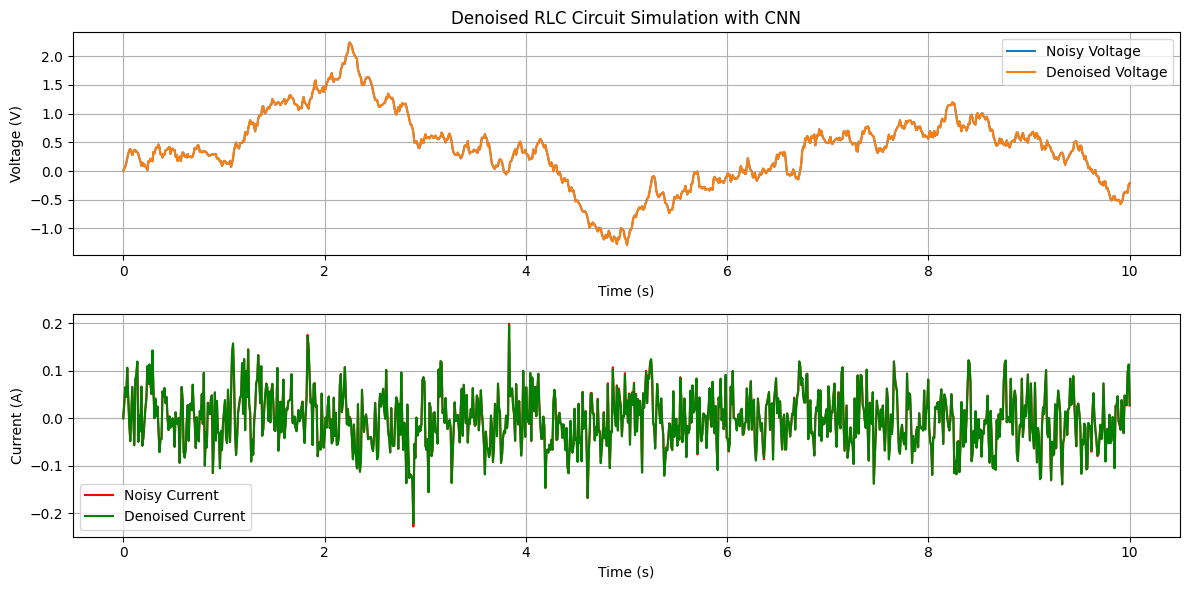

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Generate synthetic data with Gaussian noise
def rlc_circuit(t, y, R, L, C, V_in):
    V, I = y
    dVdt = I / C
    dIdt = (V_in(t) - V - R * I) / L
    return np.array([dVdt, dIdt])

def runge_kutta_4(derivs, y0, t, args, noise_std=0.01):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = derivs(t[i-1], y[i-1], *args)
        k2 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1, *args)
        k3 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2, *args)
        k4 = derivs(t[i], y[i-1] + dt * k3, *args)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        # Add Gaussian noise
        noise = np.random.normal(0, noise_std, size=y[i].shape)
        y[i] += noise
    return y

def V_in(t):
    return np.sin(t)

R, L, C = 100, 1, 0.01
y0 = [0, 0]
t = np.linspace(0, 10, 1000)
noisy_data = runge_kutta_4(rlc_circuit, y0, t, (R, L, C, V_in), noise_std=0.05)
V_noisy, I_noisy = noisy_data[:, 0], noisy_data[:, 1]

# Reshape data for CNN
input_data = np.stack([V_noisy, I_noisy], axis=1)
input_data = input_data.reshape((input_data.shape[0], input_data.shape[1], 1))

# Define the CNN model
def build_cnn(input_shape):
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=1, activation='relu', input_shape=input_shape),
        layers.Conv1D(64, kernel_size=1, activation='relu'),
        layers.MaxPooling1D(pool_size=1),
        layers.Conv1D(64, kernel_size=1, activation='relu'),
        layers.Conv1D(64, kernel_size=1, activation='relu'),
        layers.MaxPooling1D(pool_size=1),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(2)
    ])
    return model

# Build and compile the model
cnn = build_cnn(input_shape=(2, 1))
cnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = cnn.fit(input_data, noisy_data, epochs=50, batch_size=32, verbose=1)

# Predict the denoised data
denoised_data = cnn.predict(input_data)
V_denoised, I_denoised = denoised_data[:, 0], denoised_data[:, 1]

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_noisy, label='Noisy Voltage')
plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with CNN')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I_noisy, label='Noisy Current', color='r')
plt.plot(t, I_denoised, label='Denoised Current', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Epoch 1/100
32/32 [==============================] - 3s 8ms/step - loss: 0.4656
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 0.0163
Epoch 3/100
32/32 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 6.5684e-04
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 2.0763e-04
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 8.9766e-05
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 6.3258e-05
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 6.2047e-05
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 3.3586e-05
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 2.4097e-05
Epoch 11/100
32/32 [==============================] - 0s 4ms/step - loss: 2.3456e-05
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2916e-05


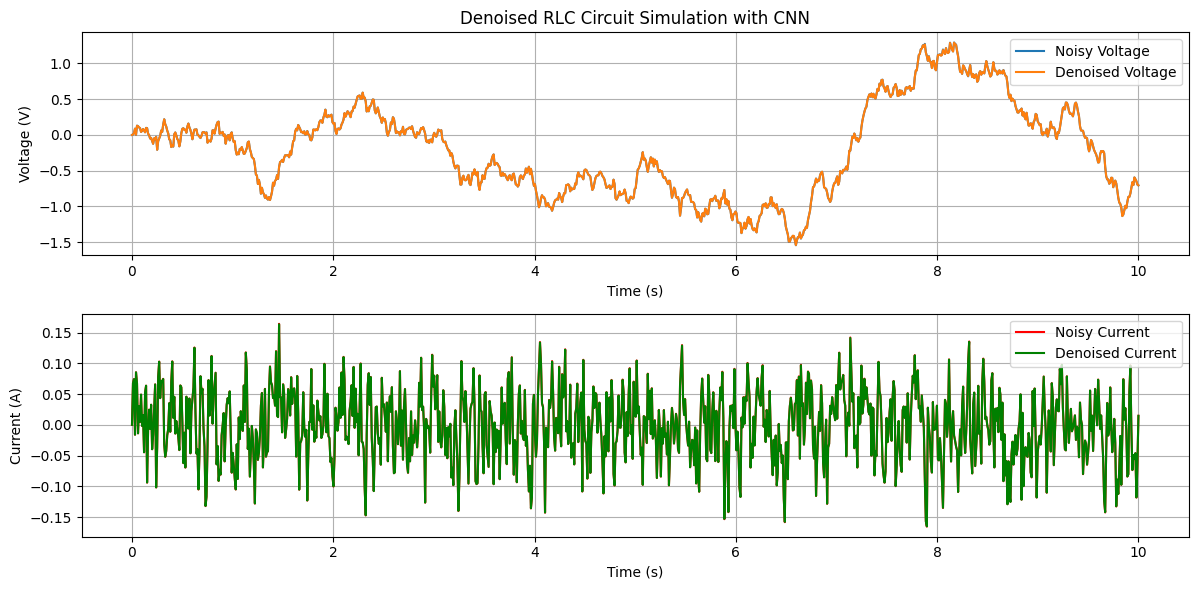

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with Gaussian noise
def rlc_circuit(t, y, R, L, C, V_in):
    V, I = y
    dVdt = I / C
    dIdt = (V_in(t) - V - R * I) / L
    return np.array([dVdt, dIdt])

def runge_kutta_4(derivs, y0, t, args, noise_std=0.01):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = derivs(t[i-1], y[i-1], *args)
        k2 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1, *args)
        k3 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2, *args)
        k4 = derivs(t[i], y[i-1] + dt * k3, *args)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        # Add Gaussian noise
        noise = np.random.normal(0, noise_std, size=y[i].shape)
        y[i] += noise
    return y

def V_in(t):
    return np.sin(t)

R, L, C = 100, 1, 0.01
y0 = [0, 0]
t = np.linspace(0, 10, 1000)
noisy_data = runge_kutta_4(rlc_circuit, y0, t, (R, L, C, V_in), noise_std=0.05)
V_noisy, I_noisy = noisy_data[:, 0], noisy_data[:, 1]

# Normalize the data
scaler = StandardScaler()
noisy_data_normalized = scaler.fit_transform(np.stack([V_noisy, I_noisy], axis=1))

# Reshape data for CNN
input_data = noisy_data_normalized.reshape((noisy_data_normalized.shape[0], noisy_data_normalized.shape[1], 1))

# Define the CNN model
def build_cnn(input_shape):
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=1, activation='relu', input_shape=input_shape),
        layers.Conv1D(64, kernel_size=1, activation='relu'),
        layers.Conv1D(64, kernel_size=1, activation='relu'),
        layers.Conv1D(64, kernel_size=1, activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(2)
    ])
    return model

# Build and compile the model
cnn = build_cnn(input_shape=(2, 1))
cnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = cnn.fit(input_data, noisy_data_normalized, epochs=100, batch_size=32, verbose=1)

# Predict the denoised data
denoised_data_normalized = cnn.predict(input_data)
denoised_data = scaler.inverse_transform(denoised_data_normalized)
V_denoised, I_denoised = denoised_data[:, 0], denoised_data[:, 1]

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_noisy, label='Noisy Voltage')
plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with CNN')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I_noisy, label='Noisy Current', color='r')
plt.plot(t, I_denoised, label='Denoised Current', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


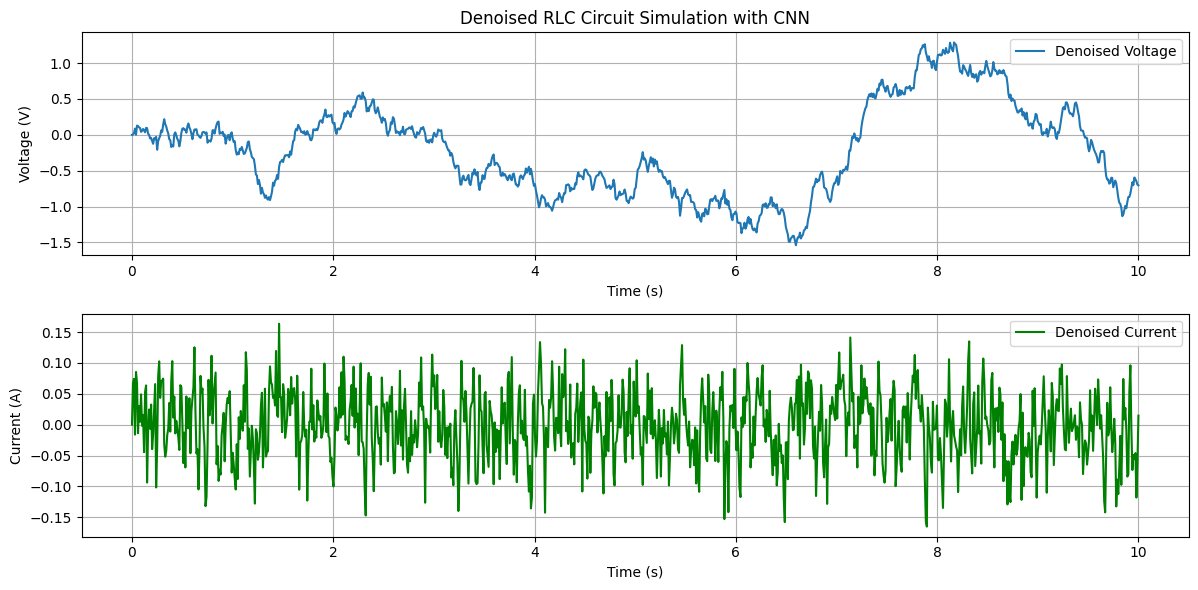

In [11]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
#plt.plot(t, V_noisy, label='Noisy Voltage')
plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with CNN')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
#plt.plot(t, I_noisy, label='Noisy Current', color='r')
plt.plot(t, I_denoised, label='Denoised Current', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


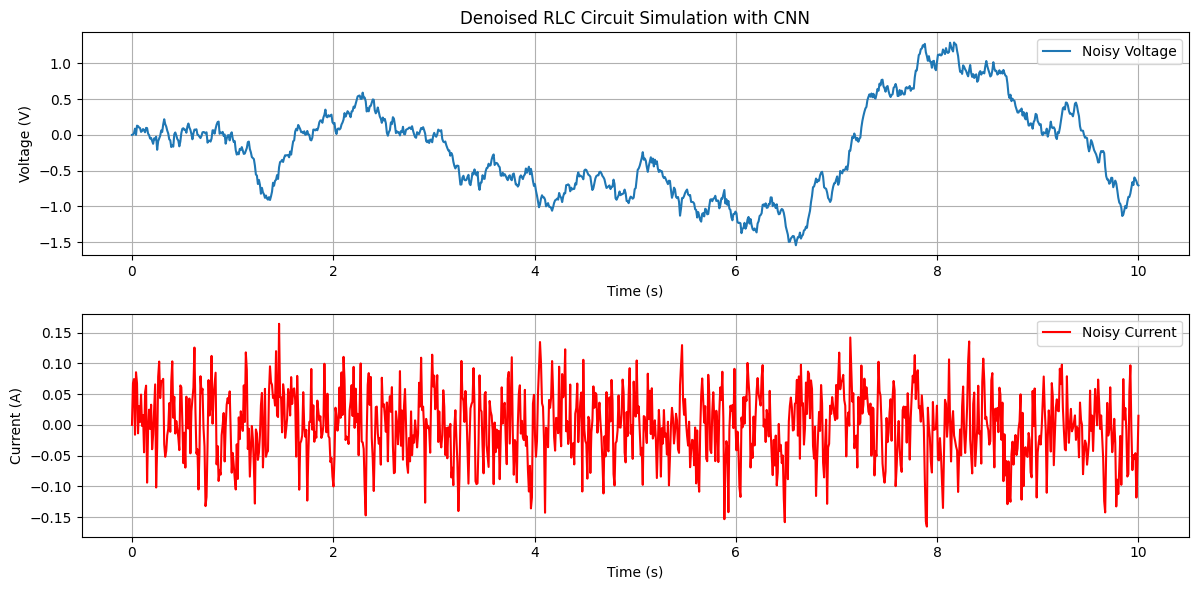

In [12]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_noisy, label='Noisy Voltage')
#plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with CNN')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I_noisy, label='Noisy Current', color='r')
#plt.plot(t, I_denoised, label='Denoised Current', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Epoch 1/200
32/32 [==============================] - 6s 31ms/step - loss: 0.2592
Epoch 2/200
32/32 [==============================] - 1s 33ms/step - loss: 0.0141
Epoch 3/200
32/32 [==============================] - 1s 35ms/step - loss: 0.0028
Epoch 4/200
32/32 [==============================] - 1s 27ms/step - loss: 7.4814e-04
Epoch 5/200
32/32 [==============================] - 1s 27ms/step - loss: 5.5313e-05
Epoch 6/200
32/32 [==============================] - 1s 22ms/step - loss: 2.6151e-05
Epoch 7/200
32/32 [==============================] - 0s 12ms/step - loss: 6.1819e-05
Epoch 8/200
32/32 [==============================] - 0s 13ms/step - loss: 2.4690e-04
Epoch 9/200
32/32 [==============================] - 0s 12ms/step - loss: 4.9187e-04
Epoch 10/200
32/32 [==============================] - 0s 12ms/step - loss: 3.4167e-04
Epoch 11/200
32/32 [==============================] - 0s 13ms/step - loss: 9.8424e-05
Epoch 12/200
32/32 [==============================] - 0s 11ms/step - loss: 

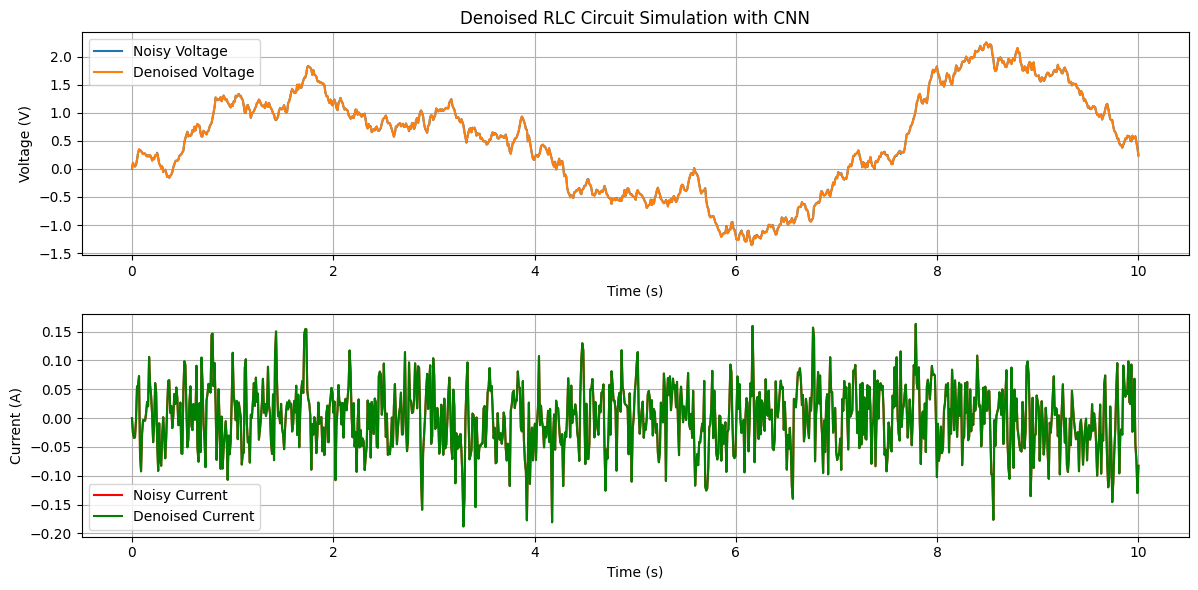

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with Gaussian noise
def rlc_circuit(t, y, R, L, C, V_in):
    V, I = y
    dVdt = I / C
    dIdt = (V_in(t) - V - R * I) / L
    return np.array([dVdt, dIdt])

def runge_kutta_4(derivs, y0, t, args, noise_std=0.01):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = derivs(t[i-1], y[i-1], *args)
        k2 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1, *args)
        k3 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2, *args)
        k4 = derivs(t[i], y[i-1] + dt * k3, *args)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        # Add Gaussian noise
        noise = np.random.normal(0, noise_std, size=y[i].shape)
        y[i] += noise
    return y

def V_in(t):
    return np.sin(t)

R, L, C = 100, 1, 0.01
y0 = [0, 0]
t = np.linspace(0, 10, 1000)
noisy_data = runge_kutta_4(rlc_circuit, y0, t, (R, L, C, V_in), noise_std=0.05)
V_noisy, I_noisy = noisy_data[:, 0], noisy_data[:, 1]

# Normalize the data
scaler = StandardScaler()
noisy_data_normalized = scaler.fit_transform(np.stack([V_noisy, I_noisy], axis=1))

# Reshape data for CNN
input_data = noisy_data_normalized.reshape((noisy_data_normalized.shape[0], noisy_data_normalized.shape[1], 1))

# Define the CNN model
def build_cnn(input_shape):
    model = models.Sequential([
        layers.Conv1D(128, kernel_size=3, activation='relu', input_shape=input_shape, padding='same'),
        layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(2)
    ])
    return model

# Build and compile the model
cnn = build_cnn(input_shape=(2, 1))
cnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = cnn.fit(input_data, noisy_data_normalized, epochs=200, batch_size=32, verbose=1)

# Predict the denoised data
denoised_data_normalized = cnn.predict(input_data)
denoised_data = scaler.inverse_transform(denoised_data_normalized)
V_denoised, I_denoised = denoised_data[:, 0], denoised_data[:, 1]

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_noisy, label='Noisy Voltage')
plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with CNN')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I_noisy, label='Noisy Current', color='r')
plt.plot(t, I_denoised, label='Denoised Current', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Epoch 1/200
32/32 [==============================] - 4s 13ms/step - loss: 0.7989
Epoch 2/200
32/32 [==============================] - 0s 14ms/step - loss: 0.5734
Epoch 3/200
32/32 [==============================] - 0s 14ms/step - loss: 0.5631
Epoch 4/200
32/32 [==============================] - 1s 16ms/step - loss: 0.5619
Epoch 5/200
32/32 [==============================] - 0s 14ms/step - loss: 0.5619
Epoch 6/200
32/32 [==============================] - 1s 19ms/step - loss: 0.5685
Epoch 7/200
32/32 [==============================] - 0s 9ms/step - loss: 0.5635
Epoch 8/200
32/32 [==============================] - 0s 9ms/step - loss: 0.5622
Epoch 9/200
32/32 [==============================] - 0s 10ms/step - loss: 0.5616
Epoch 10/200
32/32 [==============================] - 0s 9ms/step - loss: 0.5617
Epoch 11/200
32/32 [==============================] - 0s 9ms/step - loss: 0.5617
Epoch 12/200
32/32 [==============================] - 0s 10ms/step - loss: 0.5613
Epoch 13/200
32/32 [=========

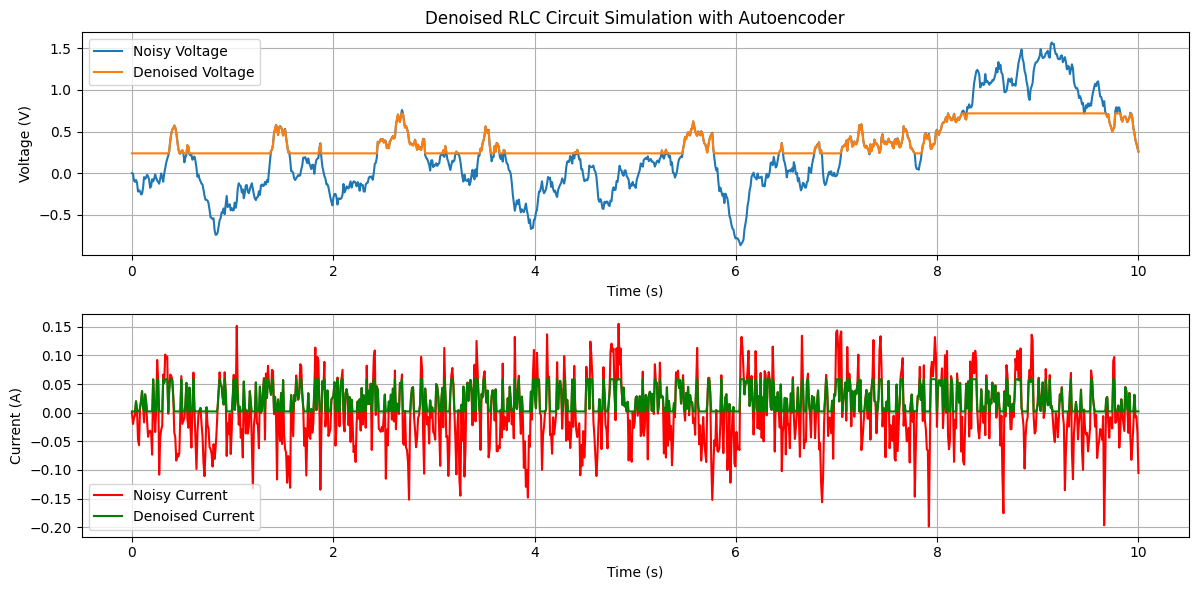

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with Gaussian noise
def rlc_circuit(t, y, R, L, C, V_in):
    V, I = y
    dVdt = I / C
    dIdt = (V_in(t) - V - R * I) / L
    return np.array([dVdt, dIdt])

def runge_kutta_4(derivs, y0, t, args, noise_std=0.01):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = derivs(t[i-1], y[i-1], *args)
        k2 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1, *args)
        k3 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2, *args)
        k4 = derivs(t[i], y[i-1] + dt * k3, *args)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        # Add Gaussian noise
        noise = np.random.normal(0, noise_std, size=y[i].shape)
        y[i] += noise
    return y

def V_in(t):
    return np.sin(t)

R, L, C = 100, 1, 0.01
y0 = [0, 0]
t = np.linspace(0, 10, 1000)
noisy_data = runge_kutta_4(rlc_circuit, y0, t, (R, L, C, V_in), noise_std=0.05)
V_noisy, I_noisy = noisy_data[:, 0], noisy_data[:, 1]

# Normalize the data
scaler = StandardScaler()
noisy_data_normalized = scaler.fit_transform(np.stack([V_noisy, I_noisy], axis=1))

# Reshape data for the autoencoder
input_data = noisy_data_normalized.reshape((noisy_data_normalized.shape[0], noisy_data_normalized.shape[1], 1))

# Define the autoencoder model
def build_autoencoder(input_shape):
    input_layer = layers.Input(shape=input_shape)
    encoded = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(input_layer)
    encoded = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(encoded)

    decoded = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(encoded)
    decoded = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(decoded)
    decoded = layers.Conv1D(1, kernel_size=3, activation='sigmoid', padding='same')(decoded)

    autoencoder = models.Model(input_layer, decoded)
    return autoencoder

# Build and compile the model
autoencoder = build_autoencoder(input_shape=(2, 1))
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = autoencoder.fit(input_data, input_data, epochs=200, batch_size=32, verbose=1)

# Predict the denoised data
denoised_data_normalized = autoencoder.predict(input_data)
denoised_data = scaler.inverse_transform(denoised_data_normalized.reshape(-1, 2))
V_denoised, I_denoised = denoised_data[:, 0], denoised_data[:, 1]

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_noisy, label='Noisy Voltage')
plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with Autoencoder')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I_noisy, label='Noisy Current', color='r')
plt.plot(t, I_denoised, label='Denoised Current', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Epoch 1/100
32/32 [==============================] - 6s 59ms/step - loss: 0.3205
Epoch 2/100
32/32 [==============================] - 3s 86ms/step - loss: 0.0155
Epoch 3/100
32/32 [==============================] - 2s 69ms/step - loss: 0.0013
Epoch 4/100
32/32 [==============================] - 2s 48ms/step - loss: 2.5279e-04
Epoch 5/100
32/32 [==============================] - 2s 52ms/step - loss: 7.5043e-05
Epoch 6/100
32/32 [==============================] - 2s 51ms/step - loss: 3.7912e-05
Epoch 7/100
32/32 [==============================] - 2s 53ms/step - loss: 3.9875e-05
Epoch 8/100
32/32 [==============================] - 2s 52ms/step - loss: 2.0515e-05
Epoch 9/100
32/32 [==============================] - 2s 64ms/step - loss: 3.7536e-05
Epoch 10/100
32/32 [==============================] - 3s 86ms/step - loss: 2.9595e-05
Epoch 11/100
32/32 [==============================] - 2s 65ms/step - loss: 1.6016e-05
Epoch 12/100
32/32 [==============================] - 2s 52ms/step - loss: 

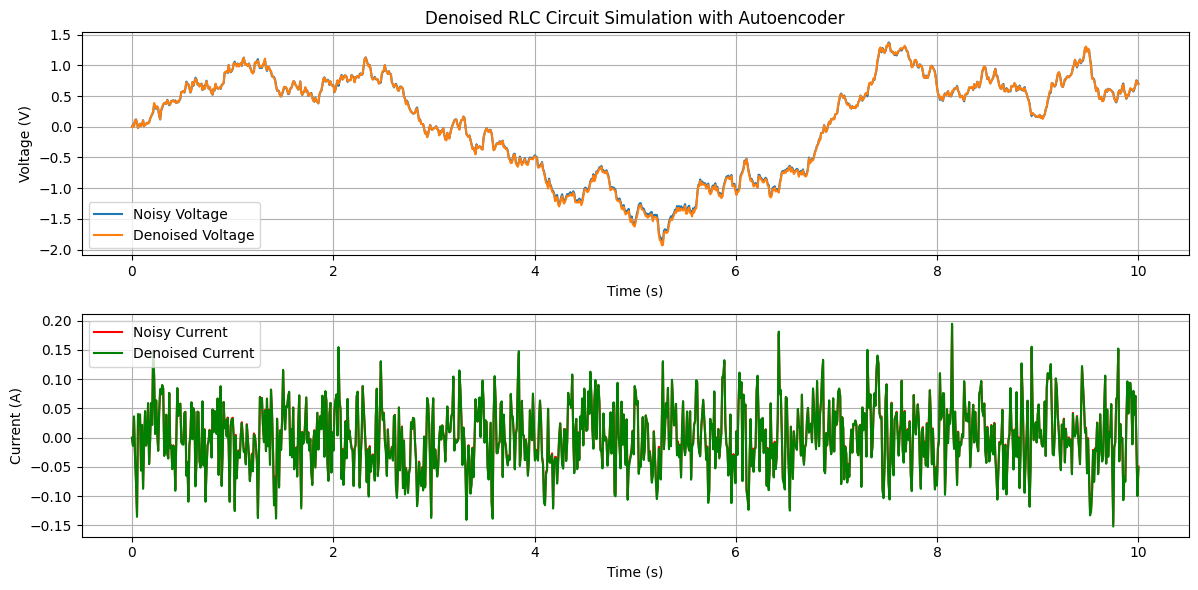

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with Gaussian noise
def rlc_circuit(t, y, R, L, C, V_in):
    V, I = y
    dVdt = I / C
    dIdt = (V_in(t) - V - R * I) / L
    return np.array([dVdt, dIdt])

def runge_kutta_4(derivs, y0, t, args, noise_std=0.01):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = derivs(t[i-1], y[i-1], *args)
        k2 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1, *args)
        k3 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2, *args)
        k4 = derivs(t[i], y[i-1] + dt * k3, *args)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        # Add Gaussian noise
        noise = np.random.normal(0, noise_std, size=y[i].shape)
        y[i] += noise
    return y

def V_in(t):
    return np.sin(t)

R, L, C = 100, 1, 0.01
y0 = [0, 0]
t = np.linspace(0, 10, 1000)
noisy_data = runge_kutta_4(rlc_circuit, y0, t, (R, L, C, V_in), noise_std=0.05)
V_noisy, I_noisy = noisy_data[:, 0], noisy_data[:, 1]

# Normalize the data
scaler = StandardScaler()
noisy_data_normalized = scaler.fit_transform(np.stack([V_noisy, I_noisy], axis=1))

# Reshape data for the autoencoder
input_data = noisy_data_normalized.reshape((noisy_data_normalized.shape[0], noisy_data_normalized.shape[1], 1))

# Define the autoencoder model
def build_autoencoder(input_shape):
    input_layer = layers.Input(shape=input_shape)
    encoded = layers.Conv1D(128, kernel_size=5, activation='relu', padding='same')(input_layer)
    encoded = layers.Conv1D(128, kernel_size=5, activation='relu', padding='same')(encoded)
    encoded = layers.Conv1D(256, kernel_size=5, activation='relu', padding='same')(encoded)

    decoded = layers.Conv1D(256, kernel_size=5, activation='relu', padding='same')(encoded)
    decoded = layers.Conv1D(128, kernel_size=5, activation='relu', padding='same')(decoded)
    decoded = layers.Conv1D(128, kernel_size=5, activation='relu', padding='same')(decoded)
    decoded = layers.Conv1D(1, kernel_size=5, activation='linear', padding='same')(decoded)

    autoencoder = models.Model(input_layer, decoded)
    return autoencoder

# Build and compile the model
autoencoder = build_autoencoder(input_shape=(2, 1))
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = autoencoder.fit(input_data, input_data, epochs=100, batch_size=32, verbose=1)

# Predict the denoised data
denoised_data_normalized = autoencoder.predict(input_data)
denoised_data = scaler.inverse_transform(denoised_data_normalized.reshape(-1, 2))
V_denoised, I_denoised = denoised_data[:, 0], denoised_data[:, 1]

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_noisy, label='Noisy Voltage')
plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with Autoencoder')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I_noisy, label='Noisy Current', color='r')
plt.plot(t, I_denoised, label='Denoised Current', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


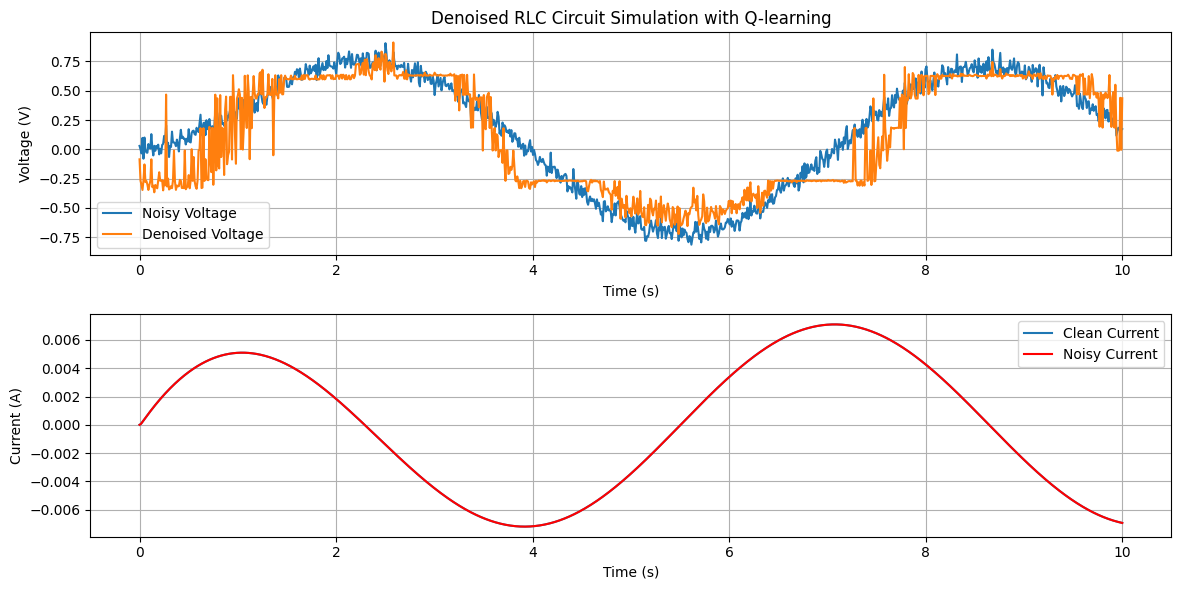

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generate synthetic clean data (without noise)
def rlc_circuit(t, y, R, L, C, V_in):
    V, I = y
    dVdt = I / C
    dIdt = (V_in(t) - V - R * I) / L
    return np.array([dVdt, dIdt])

def runge_kutta_4(derivs, y0, t, args):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = derivs(t[i-1], y[i-1], *args)
        k2 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1, *args)
        k3 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2, *args)
        k4 = derivs(t[i], y[i-1] + dt * k3, *args)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

def V_in(t):
    return np.sin(t)

R, L, C = 100, 1, 0.01
y0 = [0, 0]
t = np.linspace(0, 10, 1000)
clean_data = runge_kutta_4(rlc_circuit, y0, t, (R, L, C, V_in))
V_clean, I_clean = clean_data[:, 0], clean_data[:, 1]

# Generate synthetic noisy data
def add_noise(data, noise_std=0.05):
    noise = np.random.normal(0, noise_std, size=data.shape)
    return data + noise

V_noisy = add_noise(V_clean)

# Define the Q-learning parameters
actions = np.array([-0.01, 0, 0.01])  # Possible adjustments to the voltage
num_states = 100  # Number of discrete states
q_table = np.zeros((num_states, len(actions)))
learning_rate = 0.1
discount_factor = 0.95
num_episodes = 500

# Normalize the data to [0, 1] range for state representation
scaler = StandardScaler()
V_clean_normalized = scaler.fit_transform(V_clean.reshape(-1, 1)).flatten()
V_noisy_normalized = scaler.transform(V_noisy.reshape(-1, 1)).flatten()

# Discretize the state space
def get_state(value, num_states):
    return min(num_states - 1, max(0, int((value + 1) / 2 * num_states)))

# Q-learning algorithm
for episode in range(num_episodes):
    for i in range(len(V_noisy_normalized)):
        state = get_state(V_noisy_normalized[i], num_states)
        if np.random.rand() < 0.1:  # Exploration
            action_index = np.random.choice(len(actions))
        else:  # Exploitation
            action_index = np.argmax(q_table[state])

        action = actions[action_index]
        V_noisy_normalized[i] += action
        next_state = get_state(V_noisy_normalized[i], num_states)

        reward = -abs(V_noisy_normalized[i] - V_clean_normalized[i])
        q_table[state, action_index] = q_table[state, action_index] + learning_rate * (reward + discount_factor * np.max(q_table[next_state]) - q_table[state, action_index])

# Apply the learned adjustments to the noisy data
V_denoised_normalized = V_noisy_normalized.copy()
for i in range(len(V_noisy_normalized)):
    state = get_state(V_noisy_normalized[i], num_states)
    action_index = np.argmax(q_table[state])
    action = actions[action_index]
    V_denoised_normalized[i] += action

# Inverse transform to get the denoised data
V_denoised = scaler.inverse_transform(V_denoised_normalized.reshape(-1, 1)).flatten()

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_noisy, label='Noisy Voltage')
plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with Q-learning')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I_clean, label='Clean Current')
plt.plot(t, I_clean, label='Noisy Current', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from collections import deque
import random

# Generate synthetic clean data (without noise)
def rlc_circuit(t, y, R, L, C, V_in):
    V, I = y
    dVdt = I / C
    dIdt = (V_in(t) - V - R * I) / L
    return np.array([dVdt, dIdt])

def runge_kutta_4(derivs, y0, t, args):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = derivs(t[i-1], y[i-1], *args)
        k2 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1, *args)
        k3 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2, *args)
        k4 = derivs(t[i], y[i-1] + dt * k3, *args)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

def V_in(t):
    return np.sin(t)

R, L, C = 100, 1, 0.01
y0 = [0, 0]
t = np.linspace(0, 10, 1000)
clean_data = runge_kutta_4(rlc_circuit, y0, t, (R, L, C, V_in))
V_clean, I_clean = clean_data[:, 0], clean_data[:, 1]

# Generate synthetic noisy data
def add_noise(data, noise_std=0.05):
    noise = np.random.normal(0, noise_std, size=data.shape)
    return data + noise

V_noisy = add_noise(V_clean)

# Normalize the data to [0, 1] range for state representation
scaler = StandardScaler()
V_clean_normalized = scaler.fit_transform(V_clean.reshape(-1, 1)).flatten()
V_noisy_normalized = scaler.transform(V_noisy.reshape(-1, 1)).flatten()

# Deep Q-Network (DQN) parameters
state_size = 1
action_size = 3  # -0.01, 0, +0.01
actions = np.array([-0.01, 0, 0.01])
learning_rate = 0.01
discount_factor = 0.95
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01
batch_size = 64  # Increased batch size
num_episodes = 10  # Reduced number of episodes
memory = deque(maxlen=10)

# Define the Q-network
def build_model():
    model = models.Sequential([
        layers.Dense(24, input_dim=state_size, activation='relu'),
        layers.Dense(24, activation='relu'),
        layers.Dense(action_size, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

model = build_model()

# Replay function to train the network
def replay():
    if len(memory) < batch_size:
        return
    minibatch = random.sample(memory, batch_size)
    states = np.vstack([m[0] for m in minibatch])
    actions = np.array([m[1] for m in minibatch])
    rewards = np.array([m[2] for m in minibatch])
    next_states = np.vstack([m[3] for m in minibatch])

    targets = rewards + discount_factor * np.amax(model.predict(next_states), axis=1)
    targets_full = model.predict(states)

    indices = np.arange(batch_size)
    targets_full[indices, actions] = targets

    model.fit(states, targets_full, epochs=1, verbose=0)

# Train the DQN
for episode in range(num_episodes):
    V_noisy_normalized = scaler.transform(V_noisy.reshape(-1, 1)).flatten()  # Reset noisy data for each episode
    for i in range(len(V_noisy_normalized)):
        state = np.array([V_noisy_normalized[i]])
        if np.random.rand() <= epsilon:
            action = np.random.choice(action_size)
        else:
            action = np.argmax(model.predict(state.reshape(1, -1)))

        V_noisy_normalized[i] += actions[action]
        next_state = np.array([V_noisy_normalized[i]])

        reward = -abs(V_noisy_normalized[i] - V_clean_normalized[i])
        memory.append((state, action, reward, next_state))

        replay()

    if epsilon > min_epsilon:
        epsilon *= epsilon_decay

# Apply the learned adjustments to the noisy data
V_denoised_normalized = V_noisy_normalized.copy()
for i in range(len(V_noisy_normalized)):
    state = np.array([V_noisy_normalized[i]])
    action = np.argmax(model.predict(state.reshape(1, -1)))
    V_denoised_normalized[i] += actions[action]

# Inverse transform to get the denoised data
V_denoised = scaler.inverse_transform(V_denoised_normalized.reshape(-1, 1)).flatten()

# Convert to TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('denoising_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_noisy, label='Noisy Voltage')
plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with DQN')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I_clean, label='Clean Current')
plt.plot(t, I_clean, label='Noisy Current', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 33ms/step


KeyboardInterrupt: 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from collections import deque
import random

# Generate synthetic clean data (without noise)
def rlc_circuit(t, y, R, L, C, V_in):
    V, I = y
    dVdt = I / C
    dIdt = (V_in(t) - V - R * I) / L
    return np.array([dVdt, dIdt])

def runge_kutta_4(derivs, y0, t, args):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = derivs(t[i-1], y[i-1], *args)
        k2 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1, *args)
        k3 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2, *args)
        k4 = derivs(t[i], y[i-1] + dt * k3, *args)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

def V_in(t):
    return np.sin(t)

R, L, C = 100, 1, 0.01
y0 = [0, 0]
t = np.linspace(0, 10, 1000)
clean_data = runge_kutta_4(rlc_circuit, y0, t, (R, L, C, V_in))
V_clean, I_clean = clean_data[:, 0], clean_data[:, 1]

# Generate synthetic noisy data
def add_noise(data, noise_std=0.05):
    noise = np.random.normal(0, noise_std, size=data.shape)
    return data + noise

V_noisy = add_noise(V_clean)

# Normalize the data to [0, 1] range for state representation
scaler = StandardScaler()
V_clean_normalized = scaler.fit_transform(V_clean.reshape(-1, 1)).flatten()
V_noisy_normalized = scaler.transform(V_noisy.reshape(-1, 1)).flatten()

# Deep Q-Network (DQN) parameters
state_size = 1
action_size = 3  # -0.01, 0, +0.01
actions = np.array([-0.01, 0, 0.01])
learning_rate = 0.01
discount_factor = 0.95
epsilon = 1.0
epsilon_decay = 0.99  # Faster decay
min_epsilon = 0.01
batch_size = 64  # Increased batch size
num_episodes = 5  # Reduced number of episodes for debugging
memory = deque(maxlen=200)  # Increased memory size for better training

# Define the Q-network
def build_model():
    model = models.Sequential([
        layers.Dense(24, input_dim=state_size, activation='relu'),
        layers.Dense(24, activation='relu'),
        layers.Dense(action_size, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

model = build_model()

# Replay function to train the network
def replay():
    if len(memory) < batch_size:
        return
    minibatch = random.sample(memory, batch_size)
    states = np.vstack([m[0] for m in minibatch])
    actions = np.array([m[1] for m in minibatch])
    rewards = np.array([m[2] for m in minibatch])
    next_states = np.vstack([m[3] for m in minibatch])

    targets = rewards + discount_factor * np.amax(model.predict(next_states), axis=1)
    targets_full = model.predict(states)

    indices = np.arange(batch_size)
    targets_full[indices, actions] = targets

    model.fit(states, targets_full, epochs=1, verbose=0)

# Train the DQN
for episode in range(num_episodes):
    print(f"Episode {episode + 1}/{num_episodes}")
    V_noisy_normalized = scaler.transform(V_noisy.reshape(-1, 1)).flatten()  # Reset noisy data for each episode
    for i in range(len(V_noisy_normalized)):
        state = np.array([V_noisy_normalized[i]])
        if np.random.rand() <= epsilon:
            action = np.random.choice(action_size)
        else:
            action = np.argmax(model.predict(state.reshape(1, -1), verbose=0))

        V_noisy_normalized[i] += actions[action]
        next_state = np.array([V_noisy_normalized[i]])

        reward = -abs(V_noisy_normalized[i] - V_clean_normalized[i])
        memory.append((state, action, reward, next_state))

        replay()

    if epsilon > min_epsilon:
        epsilon *= epsilon_decay

# Apply the learned adjustments to the noisy data
V_denoised_normalized = V_noisy_normalized.copy()
for i in range(len(V_noisy_normalized)):
    state = np.array([V_noisy_normalized[i]])
    action = np.argmax(model.predict(state.reshape(1, -1), verbose=0))
    V_denoised_normalized[i] += actions[action]

# Inverse transform to get the denoised data
V_denoised = scaler.inverse_transform(V_denoised_normalized.reshape(-1, 1)).flatten()

# Convert to TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('denoising_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_noisy, label='Noisy Voltage')
plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with DQN')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I_clean, label='Clean Current')
plt.plot(t, I_clean, label='Noisy Current', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Episode 1/5
2/2 [==============================] - 0s 6ms/step


KeyboardInterrupt: 

Episode 1/5
Episode 2/5
Episode 3/5
Episode 4/5
Episode 5/5


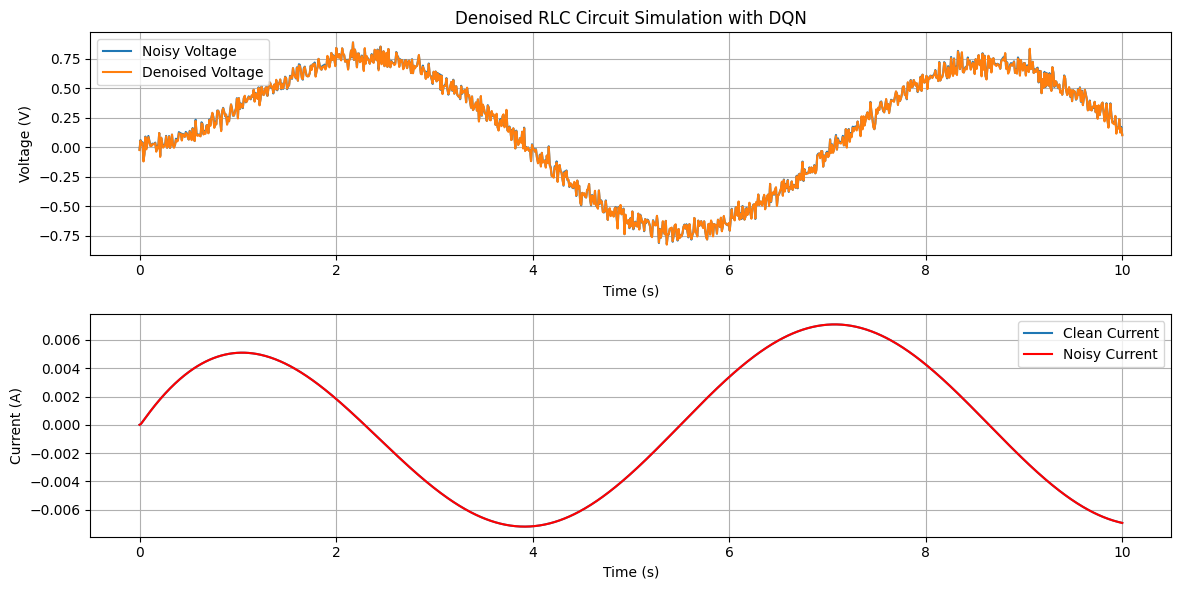

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from collections import deque
import random

# Generate synthetic clean data (without noise)
def rlc_circuit(t, y, R, L, C, V_in):
    V, I = y
    dVdt = I / C
    dIdt = (V_in(t) - V - R * I) / L
    return np.array([dVdt, dIdt])

def runge_kutta_4(derivs, y0, t, args):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = derivs(t[i-1], y[i-1], *args)
        k2 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1, *args)
        k3 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2, *args)
        k4 = derivs(t[i], y[i-1] + dt * k3, *args)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

def V_in(t):
    return np.sin(t)

R, L, C = 100, 1, 0.01
y0 = [0, 0]
t = np.linspace(0, 10, 1000)
clean_data = runge_kutta_4(rlc_circuit, y0, t, (R, L, C, V_in))
V_clean, I_clean = clean_data[:, 0], clean_data[:, 1]

# Generate synthetic noisy data
def add_noise(data, noise_std=0.05):
    noise = np.random.normal(0, noise_std, size=data.shape)
    return data + noise

V_noisy = add_noise(V_clean)

# Normalize the data to [0, 1] range for state representation
scaler = StandardScaler()
V_clean_normalized = scaler.fit_transform(V_clean.reshape(-1, 1)).flatten()
V_noisy_normalized = scaler.transform(V_noisy.reshape(-1, 1)).flatten()

# Deep Q-Network (DQN) parameters
state_size = 1
action_size = 3  # -0.01, 0, +0.01
actions = np.array([-0.01, 0, 0.01])
learning_rate = 0.01
discount_factor = 0.95
epsilon = 1.0
epsilon_decay = 0.99  # Faster decay
min_epsilon = 0.01
batch_size = 64  # Increased batch size
num_episodes = 5  # Reduced number of episodes for debugging
memory = deque(maxlen=200)  # Increased memory size for better training

# Define the Q-network
def build_model():
    model = models.Sequential([
        layers.Dense(24, input_dim=state_size, activation='relu'),
        layers.Dense(24, activation='relu'),
        layers.Dense(action_size, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

model = build_model()

# Replay function to train the network
def replay():
    if len(memory) < batch_size:
        return
    minibatch = random.sample(memory, batch_size)
    states = np.vstack([m[0] for m in minibatch])
    actions = np.array([m[1] for m in minibatch])
    rewards = np.array([m[2] for m in minibatch])
    next_states = np.vstack([m[3] for m in minibatch])

    next_q_values = model.predict(next_states, verbose=0)
    targets = rewards + discount_factor * np.amax(next_q_values, axis=1)
    targets_full = model.predict(states, verbose=0)

    indices = np.arange(batch_size)
    targets_full[indices, actions] = targets

    model.fit(states, targets_full, epochs=1, verbose=0)

# Train the DQN
for episode in range(num_episodes):
    print(f"Episode {episode + 1}/{num_episodes}")
    V_noisy_normalized = scaler.transform(V_noisy.reshape(-1, 1)).flatten()  # Reset noisy data for each episode
    for i in range(len(V_noisy_normalized)):
        state = np.array([V_noisy_normalized[i]])
        if np.random.rand() <= epsilon:
            action = np.random.choice(action_size)
        else:
            action = np.argmax(model.predict(state.reshape(1, -1), verbose=0))

        V_noisy_normalized[i] += actions[action]
        next_state = np.array([V_noisy_normalized[i]])

        reward = -abs(V_noisy_normalized[i] - V_clean_normalized[i])
        memory.append((state, action, reward, next_state))

        replay()

    if epsilon > min_epsilon:
        epsilon *= epsilon_decay

# Apply the learned adjustments to the noisy data
V_denoised_normalized = V_noisy_normalized.copy()
for i in range(len(V_noisy_normalized)):
    state = np.array([V_noisy_normalized[i]])
    action = np.argmax(model.predict(state.reshape(1, -1), verbose=0))
    V_denoised_normalized[i] += actions[action]

# Inverse transform to get the denoised data
V_denoised = scaler.inverse_transform(V_denoised_normalized.reshape(-1, 1)).flatten()

# Convert to TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('denoising_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_noisy, label='Noisy Voltage')
plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with DQN')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I_clean, label='Clean Current')
plt.plot(t, I_clean, label='Noisy Current', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


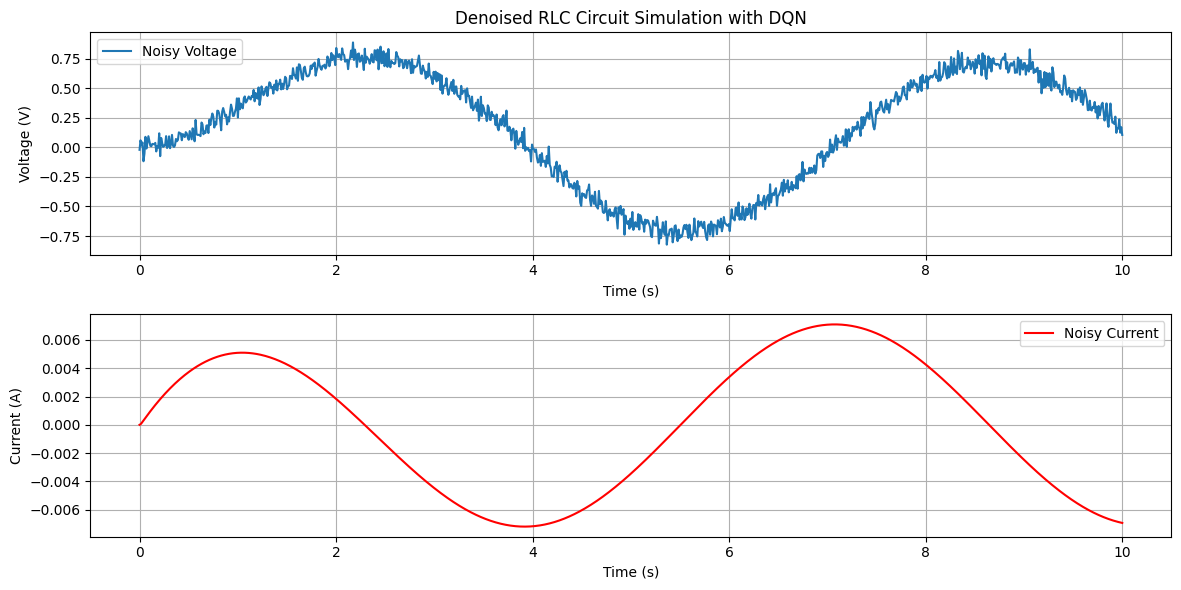

In [2]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_noisy, label='Noisy Voltage')
#plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with DQN')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
#plt.plot(t, I_clean, label='Clean Current')
plt.plot(t, I_clean, label='Noisy Current', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

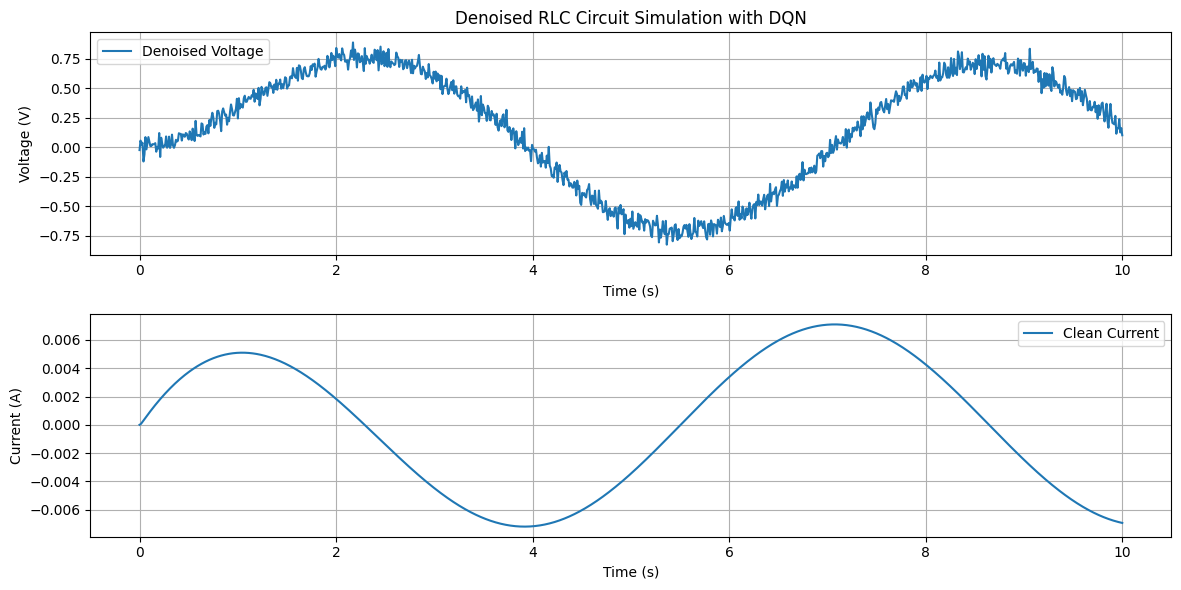

In [3]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
#plt.plot(t, V_noisy, label='Noisy Voltage')
plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with DQN')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I_clean, label='Clean Current')
#plt.plot(t, I_clean, label='Noisy Current', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from collections import deque
import random

# Generate synthetic clean data (without noise)
def rlc_circuit(t, y, R, L, C, V_in):
    V, I = y
    dVdt = I / C
    dIdt = (V_in(t) - V - R * I) / L
    return np.array([dVdt, dIdt])

def runge_kutta_4(derivs, y0, t, args):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = derivs(t[i-1], y[i-1], *args)
        k2 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1, *args)
        k3 = derivs(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2, *args)
        k4 = derivs(t[i], y[i-1] + dt * k3, *args)
        y[i] = y[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

def V_in(t):
    return np.sin(t)

R, L, C = 100, 1, 0.01
y0 = [0, 0]
t = np.linspace(0, 10, 1000)
clean_data = runge_kutta_4(rlc_circuit, y0, t, (R, L, C, V_in))
V_clean, I_clean = clean_data[:, 0], clean_data[:, 1]

# Generate synthetic noisy data
def add_noise(data, noise_std=0.05):
    noise = np.random.normal(0, noise_std, size=data.shape)
    return data + noise

V_noisy = add_noise(V_clean)

# Normalize the data to [0, 1] range for state representation
scaler = StandardScaler()
V_clean_normalized = scaler.fit_transform(V_clean.reshape(-1, 1)).flatten()
V_noisy_normalized = scaler.transform(V_noisy.reshape(-1, 1)).flatten()

# Deep Q-Network (DQN) parameters
state_size = 1
action_size = 3  # -0.01, 0, +0.01
actions = np.array([-0.01, 0, 0.01])
learning_rate = 0.001
discount_factor = 0.95
epsilon = 1.0
epsilon_decay = 0.99  # Faster decay
min_epsilon = 0.01
batch_size = 64  # Increased batch size
num_episodes = 5  # Reduced number of episodes for debugging
memory = deque(maxlen=200)  # Increased memory size for better training

# Define the Q-network with LSTM
def build_model():
    model = models.Sequential([
        layers.LSTM(24, input_shape=(1, state_size), return_sequences=True),
        layers.LSTM(24, return_sequences=False),
        layers.Dense(action_size, activation='linear')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

model = build_model()

# Replay function to train the network
def replay():
    if len(memory) < batch_size:
        return
    minibatch = random.sample(memory, batch_size)
    states = np.array([m[0] for m in minibatch])
    actions = np.array([m[1] for m in minibatch])
    rewards = np.array([m[2] for m in minibatch])
    next_states = np.array([m[3] for m in minibatch])

    states = np.reshape(states, (batch_size, 1, state_size))
    next_states = np.reshape(next_states, (batch_size, 1, state_size))

    next_q_values = model.predict(next_states, verbose=0)
    targets = rewards + discount_factor * np.amax(next_q_values, axis=1)
    targets_full = model.predict(states, verbose=0)

    indices = np.arange(batch_size)
    targets_full[indices, actions] = targets

    model.fit(states, targets_full, epochs=1, verbose=0)

# Train the DQN
for episode in range(num_episodes):
    print(f"Episode {episode + 1}/{num_episodes}")
    V_noisy_normalized = scaler.transform(V_noisy.reshape(-1, 1)).flatten()  # Reset noisy data for each episode
    for i in range(len(V_noisy_normalized)):
        state = np.array([V_noisy_normalized[i]])
        state = np.reshape(state, (1, 1, state_size))
        if np.random.rand() <= epsilon:
            action = np.random.choice(action_size)
        else:
            action = np.argmax(model.predict(state, verbose=0))

        V_noisy_normalized[i] += actions[action]
        next_state = np.array([V_noisy_normalized[i]])
        next_state = np.reshape(next_state, (1, 1, state_size))

        reward = -abs(V_noisy_normalized[i] - V_clean_normalized[i])
        memory.append((state, action, reward, next_state))

        replay()

    if epsilon > min_epsilon:
        epsilon *= epsilon_decay

# Apply the learned adjustments to the noisy data
V_denoised_normalized = V_noisy_normalized.copy()
for i in range(len(V_noisy_normalized)):
    state = np.array([V_noisy_normalized[i]])
    state = np.reshape(state, (1, 1, state_size))
    action = np.argmax(model.predict(state, verbose=0))
    V_denoised_normalized[i] += actions[action]

# Inverse transform to get the denoised data
V_denoised = scaler.inverse_transform(V_denoised_normalized.reshape(-1, 1)).flatten()

# Convert to TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('denoising_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, V_noisy, label='Noisy Voltage')
plt.plot(t, V_denoised, label='Denoised Voltage')
plt.title('Denoised RLC Circuit Simulation with DQN')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, I_clean, label='Clean Current')
plt.plot(t, I_clean, label='Noisy Current', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Episode 1/5
Episode 2/5
Episode 3/5
Episode 4/5
Episode 5/5


ConverterError: /usr/lib/python3.10/runpy.py:196:1: error: 'tf.TensorListReserve' op requires element_shape to be static during TF Lite transformation pass
    return _run_code(code, main_globals, None,
^
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
/usr/lib/python3.10/runpy.py:196:1: error: failed to legalize operation 'tf.TensorListReserve' that was explicitly marked illegal
    return _run_code(code, main_globals, None,
^
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall"]): called from
<unknown>:0: error: Lowering tensor list ops is failed. Please consider using Select TF ops and disabling `_experimental_lower_tensor_list_ops` flag in the TFLite converter object. For example, converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]\n converter._experimental_lower_tensor_list_ops = False
